In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from importlib import reload
import os
from collections import Counter
from sklearn.metrics import roc_auc_score as auc
import copy
from sklearn.ensemble import HistGradientBoostingClassifier as hgbc
import pickle
import warnings
warnings.filterwarnings("ignore")
import itertools
import math

import TunaSims
import func_ob
import tools
import datasetBuilder
import testUtils
import spectral_similarity

Play with Different Settings Here...How does simlarity change with parameters

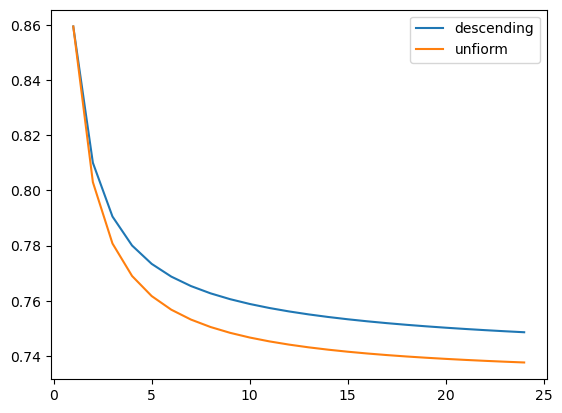

In [35]:
xs=list()
scores_1=list()
scores_2=list()

total_difference = 0.9
len_difference = 10
max_len = 25

func1 = partial(TunaSims.tuna_dif_distance,f=1,g=1,h=2)
func2 = partial(TunaSims.tuna_dif_distance,f=1,g=1,h=2)

normalize = False

for i in range(1,max_len):

    xs.append(i)
    dif_1 = np.array([1/(x+1) for x in range(i)])
    dif_1 = dif_1/sum(dif_1)*total_difference

    dif_2 = np.array([total_difference/i for x in range(i)])

    if normalize:
        scores_1.append(1- 1/func1(dif_1))
        scores_2.append(1 - 1/func2(dif_2))
    else:
        scores_1.append(func1(dif_1, np.zeros(len(dif_1))))
        scores_2.append(func2(dif_2, np.zeros(len(dif_2))))

plt.plot(xs, scores_1, label='descending')
plt.plot(xs, scores_2, label='unfiorm')

plt.legend()
plt.show()

Metlin Q-Tof Only for exploration of Collision Energy

view results

In [105]:
input_path = '/Users/jonahpoczobutt/projects/TunaRes/test_2'

In [113]:
with open(f'{input_path}/metlin_ce/sims_dict.pkl','rb') as handle:
    sims_dict = pickle.load(handle)

with open(f'{input_path}/metlin_ce/counts_dict.pkl','rb') as handle:
    counts_dict = pickle.load(handle)

same_mode = True
same_precursor_type = True
same_key = False
same_base = False
within_ppm = False
key=(same_mode,same_precursor_type,same_key, same_base, within_ppm)

sims1 = pd.DataFrame(sims_dict[key],columns=[0,10,20,40])
sims1.insert(0,'Collision Energy',[0,10,20,40])
sims1 = sims1.round(2)
counts1 = pd.DataFrame(counts_dict[key],columns=[0,10,20,40])
counts1 = counts1.astype(int)
counts1.insert(0,'Collision Energy',[0,10,20,40])

print(f'')
print(sims1.head())
print('\n')
print(counts1.head())


   Collision Energy     0    10    20    40
0                 0  0.03  0.06  0.07  0.05
1                10  0.05  0.13  0.18  0.13
2                20  0.06  0.22  0.35  0.30
3                40  0.06  0.26  0.49  0.58


   Collision Energy      0     10     20     40
0                 0  69910  69910  69910  69794
1                10  69910  69910  69910  69794
2                20  69910  69910  69910  69794
3                40  69794  69794  69794  69678


In [114]:
pd.read_pickle('/Users/jonahpoczobutt/projects/TunaRes/test_2/intermediateOutputs/gbc_res/ind_aucs_3_ppm.pkl')

,metric,same_train,dif_train,same_val,dif_val,same_test,dif_test
0,entropy_0,0.892788,0.765366,0.909009,0.781400,0.892413,0.766587
1,entropy_1,0.897370,0.771578,0.914457,0.787233,0.896631,0.771730
2,entropy_2,0.900353,0.772823,0.915001,0.788174,0.898884,0.774362
3,entropy_3,0.901471,0.774251,0.915576,0.787482,0.904304,0.776285
4,manhattan_0,0.887688,0.763461,0.905957,0.779897,0.887684,0.764555
5,manhattan_1,0.887431,0.768471,0.908611,0.785764,0.887760,0.768761
6,manhattan_2,0.896009,0.772469,0.913807,0.789125,0.895990,0.772915
7,manhattan_3,0.895084,0.770029,0.913382,0.786048,0.893791,0.769686
8,lorentzian_0,0.896340,0.767276,0.911393,0.783334,0.895771,0.768565
9,lorentzian_1,0.887688,0.763461,0.905957,0.779897,0.887684,0.764555


In [ ]:
gbc_res = pd.read_pickle('/Users/jonahpoczobutt/projects/TunaRes/test/intermediateOutputs/gbc_res/model_aucs_10_ppm.pkl')
gbc_res['name']=[i.split('_')[0] for i in gbc_res['name']]
grouped = gbc_res.groupby('name').mean()
grouped

In [ ]:
ind_aucs = pd.read_pickle('/Users/jonahpoczobutt/projects/TunaRes/test/intermediateOutputs/gbc_res/ind_aucs.pkl')
ind_aucs

In [ ]:
trained_toFunc = pd.read_pickle('/Users/jonahpoczobutt/projects/TunaRes/test/intermediateOutputs/train_to_func/trained_reses_10_ppm.pkl')
test_toFunc = pd.read_pickle('/Users/jonahpoczobutt/projects/TunaRes/test/intermediateOutputs/train_to_func/test_reses_10_ppm.pkl')

In [ ]:
for i in trained_toFunc[0].columns:
    print(f"{i.split('_')[0]}: {round(np.mean(trained_toFunc[0][i]),2)} {round(np.mean(test_toFunc[0][i]),2)}")

In [ ]:
trained_toFunc[0]